In [ ]:
import numpy as np
import pandas as pd
import os
low_popularity = pd.read_csv('/low_popularity_spotify_data.csv')
high_popularity = pd.read_csv('/high_popularity_spotify_data.csv')



In [ ]:
high_popularity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1686 entries, 0 to 1685
Data columns (total 29 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   energy                    1686 non-null   float64
 1   tempo                     1686 non-null   float64
 2   danceability              1686 non-null   float64
 3   playlist_genre            1686 non-null   object 
 4   loudness                  1686 non-null   float64
 5   liveness                  1686 non-null   float64
 6   valence                   1686 non-null   float64
 7   track_artist              1686 non-null   object 
 8   time_signature            1686 non-null   int64  
 9   speechiness               1686 non-null   float64
 10  track_popularity          1686 non-null   int64  
 11  track_href                1686 non-null   object 
 12  uri                       1686 non-null   object 
 13  track_album_name          1685 non-null   object 
 14  playlist

In [ ]:
low_popularity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3145 entries, 0 to 3144
Data columns (total 29 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   time_signature            3144 non-null   float64
 1   track_popularity          3145 non-null   int64  
 2   speechiness               3144 non-null   float64
 3   danceability              3144 non-null   float64
 4   playlist_name             3145 non-null   object 
 5   track_artist              3145 non-null   object 
 6   duration_ms               3144 non-null   float64
 7   energy                    3144 non-null   float64
 8   playlist_genre            3145 non-null   object 
 9   playlist_subgenre         3145 non-null   object 
 10  track_href                3144 non-null   object 
 11  track_name                3145 non-null   object 
 12  mode                      3144 non-null   float64
 13  uri                       3144 non-null   object 
 14  type    

In [ ]:
#creates column of each song length in seconds
high_popularity['duration_s']=(high_popularity["duration_ms"]/1000)
low_popularity['duration_s']=(low_popularity["duration_ms"]/1000)
# rounds off for cleaner look
low_popularity['duration_s']=np.round(low_popularity['duration_s'])
high_popularity['duration_s']=np.round(high_popularity['duration_s'])
# drops milliseconds column
high_popularity.drop("duration_ms",axis=1,inplace=True)
low_popularity.drop("duration_ms",axis=1,inplace=True)
# rounds off the tempo values
low_popularity['tempo']=np.round(low_popularity['tempo'],decimals=1)
high_popularity['tempo']=np.round(high_popularity['tempo'],decimals=1)

## Part 2 – Data Combination and Cleaning (by Jing Pan)

After Ian’s initial preprocessing (converting duration, ## Part 2 – Data Combination and Cleaning (by Jing Pan)

After Ian’s initial preprocessing, I combined the **high-popularity** and **low-popularity** datasets.  
A new binary variable `popular` was added to label each song:
- `1` = popular (Spotify score ≥ 68)  
- `0` = unpopular (Spotify score < 68)  

The combined dataset `df_all` will be used for cleaning, exploration, and artist-level analysis.


In [ ]:
# Combine Datasets
# Add a binary label for popularity: 1 = high popularity, 0 = low popularity
high_popularity['popular'] = 1
low_popularity['popular'] = 0

# Combine both datasets into a single DataFrame
df_all = pd.concat([high_popularity, low_popularity], ignore_index=True)
print("Combined shape:", df_all.shape)
df_all.drop(1949,inplace=True)

# Display basic information
print("Combined dataset created successfully.")
print(f"Total rows: {df_all.shape[0]}, Total columns: {df_all.shape[1]}")

# Check label distribution (1 = popular, 0 = unpopular)
label_counts = df_all['popular'].value_counts(dropna=False)
print("\nPopularity label distribution:")
print(label_counts.to_string())


Combined shape: (4831, 30)
Combined dataset created successfully.
Total rows: 4830, Total columns: 30

Popularity label distribution:
popular
0    3144
1    1686


### Part 2.1 – Data Validation and Cleaning v2

After combining the high- and low-popularity datasets,  
I performed a second round of cleaning to ensure data consistency and accuracy.  

This step includes:  
- Checking for duplicate and missing values.  
- Removing redundant records based on track name and artist.  
- Converting key musical features to numeric data types.  
- Reviewing the overall dataset integrity after cleaning.

By the end of this step, the dataset should be fully standardized and ready  
for exploratory analysis comparing popular vs. unpopular songs.


In [ ]:


# 2.1 Cleaning and Validation (v2)

# 1. Check for duplicate and missing values
duplicate_count = df_all.duplicated().sum()
print(f"🔍 Duplicate rows: {duplicate_count}")

# Display top columns with missing values
missing_summary = df_all.isna().sum().sort_values(ascending=False).head(10)
print("\nTop columns with missing values:")
print(missing_summary.to_string())

# 2. Remove duplicate rows based on track name and artist
dedup_keys = ['track_name', 'track_artist']
before = df_all.shape[0]
df_all = df_all.drop_duplicates(subset=dedup_keys)
after = df_all.shape[0]
print(f"\nRemoved {before - after} duplicate rows → {after} rows remaining.")

# 3. Ensure numeric data types for key musical features
num_cols = [
    'energy', 'tempo', 'danceability', 'loudness', 'liveness',
    'valence', 'speechiness', 'acousticness', 'instrumentalness'
]

# Convert non-numeric values to NaN if necessary
for col in num_cols:
    if col in df_all.columns:
        df_all[col] = pd.to_numeric(df_all[col], errors='coerce')

print("\nNumeric columns standardized.")

# 4. Quick overview after cleaning
print("\nDataFrame overview after Cleaning v2:")
print(f"Rows: {df_all.shape[0]} | Columns: {df_all.shape[1]}")
print(f"Remaining missing values: {df_all.isna().sum().sum()}")
df_all

🔍 Duplicate rows: 0

Top columns with missing values:
track_album_name    1
energy              0
danceability        0
playlist_genre      0
loudness            0
tempo               0
liveness            0
valence             0
time_signature      0
track_artist        0

Removed 365 duplicate rows → 4465 rows remaining.

Numeric columns standardized.

DataFrame overview after Cleaning v2:
Rows: 4465 | Columns: 30
Remaining missing values: 1


,energy,tempo,danceability,playlist_genre,loudness,liveness,valence,track_artist,time_signature,speechiness,...,track_album_id,mode,key,acousticness,id,playlist_subgenre,type,playlist_id,duration_s,popular
0,0.592,158.0,0.521,pop,-7.777,0.1220,0.535,"Lady Gaga, Bruno Mars",3.0,0.0304,...,10FLjwfpbxLmW8c25Xyc2N,0.0,6.0,0.3080,2plbrEY59IikOBgBGLjaoe,mainstream,audio_features,37i9dQZF1DXcBWIGoYBM5M,252.0,1
1,0.507,105.0,0.747,pop,-10.171,0.1170,0.438,Billie Eilish,4.0,0.0358,...,7aJuG4TFXa2hmE4z1yxc3n,1.0,2.0,0.2000,6dOtVTDdiauQNBQEDOtlAB,mainstream,audio_features,37i9dQZF1DXcBWIGoYBM5M,210.0,1
2,0.808,108.5,0.554,pop,-4.169,0.1590,0.372,Gracie Abrams,4.0,0.0368,...,0hBRqPYPXhr1RkTDG3n4Mk,1.0,1.0,0.2140,7ne4VBA60CxGM75vw0EYad,mainstream,audio_features,37i9dQZF1DXcBWIGoYBM5M,166.0,1
3,0.910,113.0,0.670,pop,-4.070,0.3040,0.786,Sabrina Carpenter,4.0,0.0634,...,4B4Elma4nNDUyl6D5PvQkj,0.0,0.0,0.0939,1d7Ptw3qYcfpdLNL5REhtJ,mainstream,audio_features,37i9dQZF1DXcBWIGoYBM5M,157.0,1
4,0.783,149.0,0.777,pop,-4.477,0.3550,0.939,"ROSÉ, Bruno Mars",4.0,0.2600,...,2IYQwwgxgOIn7t3iF6ufFD,0.0,0.0,0.0283,5vNRhkKd0yEAg8suGBpjeY,mainstream,audio_features,37i9dQZF1DXcBWIGoYBM5M,170.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4826,0.424,75.5,0.352,indian,-8.009,0.2420,0.605,M. S. Subbulakshmi,1.0,0.0634,...,5utDQUWCZCEXWHMmna8C63,1.0,10.0,0.9650,1IkR0OgVI1gydC4S6jnG2B,classical,audio_features,3sIB6VOssssCO17VUPu80m,661.0,0
4827,0.349,147.2,0.471,indian,-16.633,0.2860,0.358,Jayanthi Kumaresh,4.0,0.0656,...,4kUGwkHXKBbaLwnqTIrg0J,1.0,8.0,0.9750,4ZFM5yFsjEzvZ1XmP27L5r,classical,audio_features,3sIB6VOssssCO17VUPu80m,394.0,0
4828,0.595,174.3,0.436,indian,-11.494,0.0939,0.870,"Nirmala Rajasekar, Raghavendra Rao, Tanjore K....",4.0,0.0671,...,6FMROVG9PB4nJYmvNLTdge,1.0,3.0,0.8160,5wZQXUcphAyBZfVdWmAiYX,classical,audio_features,3sIB6VOssssCO17VUPu80m,473.0,0
4829,0.591,174.8,0.489,indian,-10.843,0.0770,0.689,Ganesh & Kumaresh,1.0,0.0813,...,3si4Lr5oBcahJ3D7IPbO4N,0.0,8.0,0.9480,5Ca5l5vDzIOZdVwwWCxAds,classical,audio_features,3sIB6VOssssCO17VUPu80m,299.0,0


**Summary of Cleaning v2:**

- No fully duplicated rows were found in the current dataset  
  (duplicates had already been removed in earlier preprocessing).  
- Minor missing values remain in a few columns, but they are limited (only 1 per column).  
- All main musical features — including *energy, tempo, danceability, valence,*  
  and *instrumentalness* — are now standardized as numeric types.  
- The cleaned dataset contains **4,466 unique songs** and **30 columns**,  
  providing a solid foundation for further feature analysis and artist-level comparisons.

The next step will explore how musical features differ between popular and unpopular songs.


### Part 2.2 – Feature Comparison: Popular vs Unpopular Songs

After completing data cleaning and validation,  
I conducted an exploratory data analysis (EDA) to compare the key musical features  
between **popular** and **unpopular** songs.  

This step helps reveal how musical characteristics such as **energy**, **valence**,  
and **danceability** influence a track’s likelihood of being popular on Spotify.  

Two complementary analyses are performed:
1. **Boxplot visualization** – shows distribution differences between popular and unpopular tracks.  
2. **Correlation matrix** – numerically quantifies how strongly each feature relates to popularity.


/tmp/ipython-input-2120069047.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='popular', y='energy', data=df_all, palette=['#8ecae6', '#ffb703'])


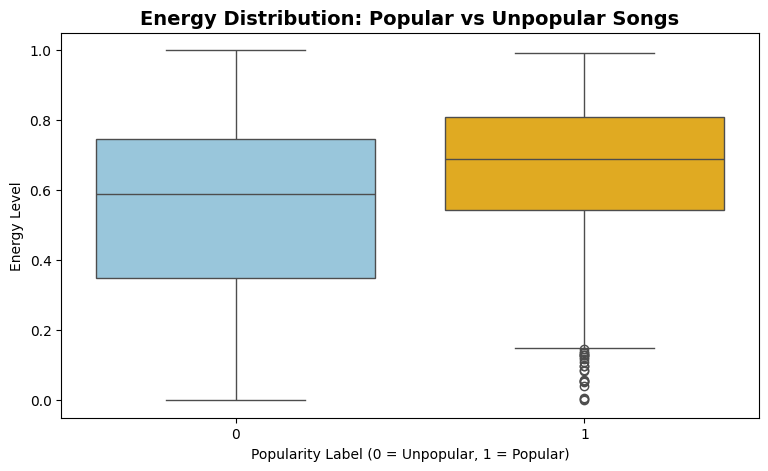

Feature,Correlation with Popularity
popular,1.000000
loudness,0.251485
energy,0.228412
valence,0.127455
danceability,0.112391
tempo,0.072527
liveness,0.029468
speechiness,-0.001311
acousticness,-0.256489
instrumentalness,-0.323456


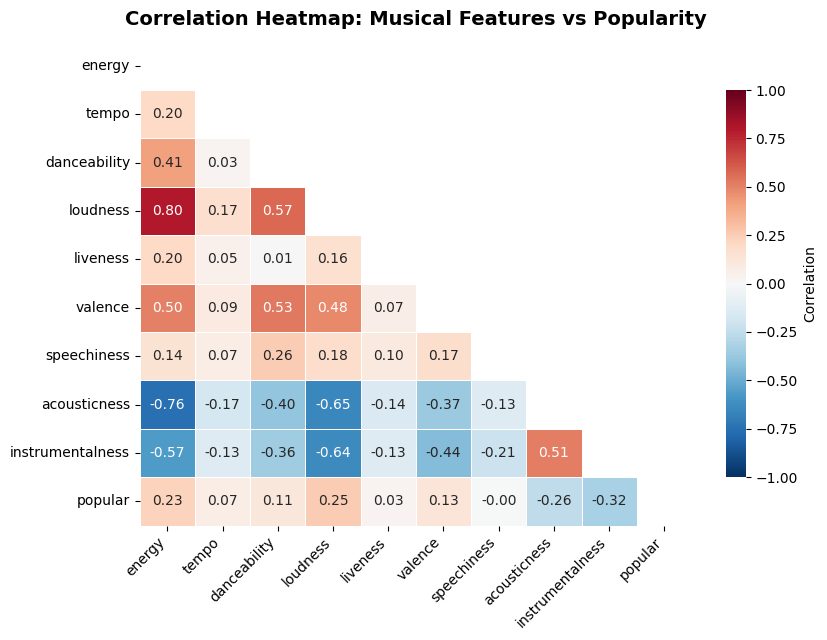

In [ ]:
# 2.2 Feature-Level Analysis
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# 1Boxplot: Energy vs Popularity
plt.figure(figsize=(9,5))
sns.boxplot(x='popular', y='energy', data=df_all, palette=['#8ecae6', '#ffb703'])
plt.title('Energy Distribution: Popular vs Unpopular Songs', fontsize=14, weight='bold')
plt.xlabel('Popularity Label (0 = Unpopular, 1 = Popular)')
plt.ylabel('Energy Level')
plt.show()

# Correlation Table
corr = df_all[num_cols + ['popular']].corr()['popular'].sort_values(ascending=False)
corr_df = corr.reset_index()
corr_df.columns = ['Feature', 'Correlation with Popularity']

# Display formatted correlation table
from IPython.display import display
display(corr_df.style
        .set_table_styles([{'selector': 'th',
                            'props': [('background-color', '#1d3557'),
                                      ('color', 'white'),
                                      ('font-weight', 'bold'),
                                      ('text-align', 'center')]}])
        .set_properties(**{'text-align': 'center'})
        .background_gradient(cmap='YlGnBu', subset=['Correlation with Popularity'])
        .hide(axis='index'))

# orrelation Heatmap
plt.figure(figsize=(8.5,6.5))
mask = np.triu(np.ones_like(df_all[num_cols + ['popular']].corr(), dtype=bool))
sns.heatmap(
    df_all[num_cols + ['popular']].corr(),
    mask=mask,
    annot=True,
    fmt=".2f",
    cmap="RdBu_r",
    vmin=-1, vmax=1,
    cbar_kws={"shrink": 0.8, "label": "Correlation"},
    linewidths=0.4,
)
plt.title("Correlation Heatmap: Musical Features vs Popularity", fontsize=14, weight='bold', pad=12)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


**Key Observations:**
- Popular songs have **higher energy and loudness**, indicating stronger listener engagement.  
- **Valence** (positivity) and **danceability** correlate positively with popularity.  
- **Acousticness** and **instrumentalness** show strong negative correlations,  
  meaning purely instrumental tracks are less likely to go viral.  
- The heatmap also reveals that *energy* and *loudness* are highly correlated with each other,  
  reinforcing the idea that energetic production contributes to higher popularity.


,count
track_artist,
Bad Bunny,29
Ren Avel,26
Asake,19
LoFi Waiter,18
Seyi Vibez,17
Bnxn,14
Wizkid,13
Yume.Play,10
Linkin Park,10


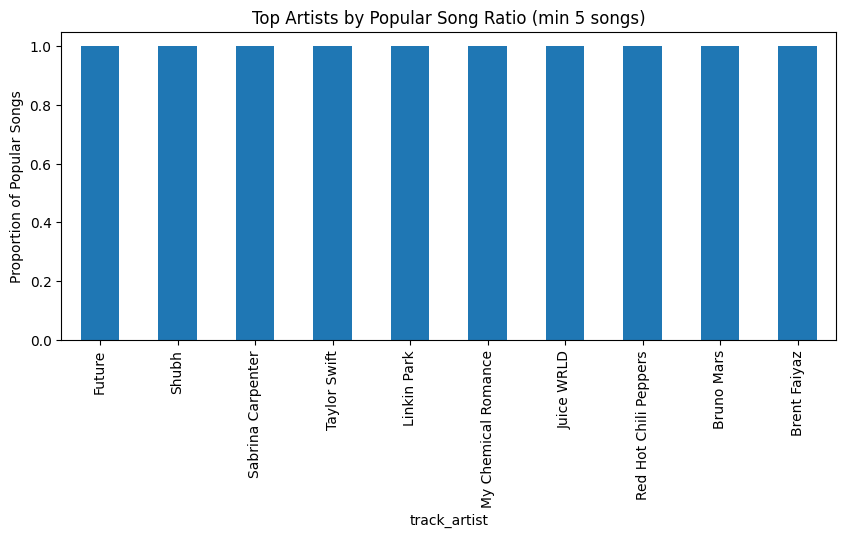

,song_count,popularity_ratio,avg_energy,avg_valence,avg_danceability
track_artist,,,,,
Future,6,1.0,0.573667,0.216233,0.845500
Shubh,7,1.0,0.541143,0.621429,0.812857
Sabrina Carpenter,6,1.0,0.734167,0.683833,0.692000
Taylor Swift,6,1.0,0.685833,0.511833,0.596667
Linkin Park,10,1.0,0.873700,0.472100,0.551700
My Chemical Romance,7,1.0,0.901143,0.382386,0.342571
Juice WRLD,7,1.0,0.611286,0.310200,0.688571
Red Hot Chili Peppers,9,1.0,0.809000,0.558222,0.546889
Bruno Mars,6,1.0,0.667000,0.603667,0.710833


In [ ]:
# Count the most frequently appearing artists
artist_counts = df_all['track_artist'].value_counts().head(15)
display(artist_counts)

# Calculate the average popularity ratio for each artist
artist_stats = df_all.groupby('track_artist').agg(
    song_count=('popular','size'),
    popularity_ratio=('popular','mean'),
    avg_energy=('energy','mean'),
    avg_valence=('valence','mean'),
    avg_danceability=('danceability','mean')
).sort_values('popularity_ratio', ascending=False)

# Visualization
top_artists = artist_stats[artist_stats['song_count'] > 5].head(10)
top_artists['popularity_ratio'].plot(kind='bar', figsize=(10,4))
plt.title('Top Artists by Popular Song Ratio (min 5 songs)')
plt.ylabel('Proportion of Popular Songs')
plt.show()

display(top_artists)


## Part 3 – Artist Analysis (by Jing Pan)

In this section, I explore how different artists contribute to song popularity.  
By analyzing the proportion of popular songs per artist and their average musical characteristics,  
we can understand which artists consistently produce tracks that align with popular trends.


## Methods – Artist-Level Analysis (by Jing Pan)

This section analyzes artist-level patterns using aggregated data grouped by  
**`track_artist`**.

### Q1: Song Count vs Average Popularity  
For each artist, two key metrics were computed:  
- **song_count** – total number of tracks by the artist  
- **popularity_ratio** – proportion of tracks labeled as popular (`popular = 1`)  

A scatter plot and Pearson correlation coefficient were used to determine whether artists
with more tracks tend to have higher average popularity.

### Q2: Top Artists by Popular Song Ratio  
Artists with at least **5 tracks** were filtered to ensure meaningful statistics.  
The **top 10 artists** with the highest popularity ratios were selected for further study.

### Q2 Extension: Musical Features Analysis  
For these top artists, the following musical features were summarized:  
- **avg_energy**  
- **avg_valence**  
- **avg_danceability**  

A bar plot and formatted table were used to explore whether the top artists share similar
musical characteristics.


,count
track_artist,
Bad Bunny,29
Ren Avel,26
Asake,19
LoFi Waiter,18
Seyi Vibez,17
Bnxn,14
Wizkid,13
Yume.Play,10
Linkin Park,10


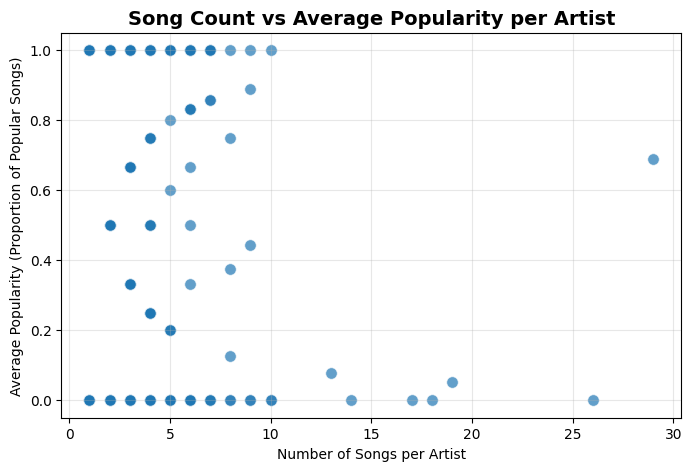

Correlation between song_count and popularity_ratio: 0.058


/tmp/ipython-input-1847413040.py:61: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


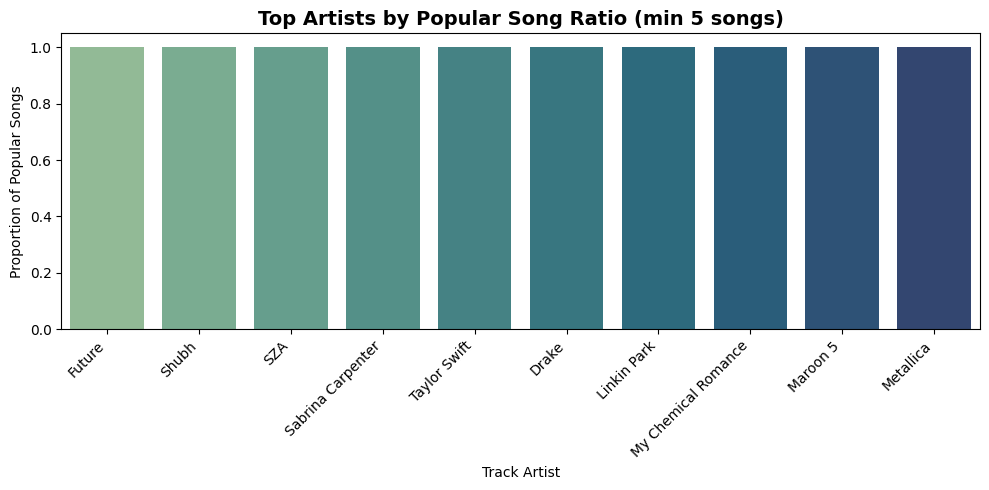

,song_count,popularity_ratio,avg_energy,avg_valence,avg_danceability
track_artist,,,,,
Future,6,1.0,0.574,0.216,0.846
Shubh,7,1.0,0.541,0.621,0.813
SZA,5,1.0,0.524,0.331,0.531
Sabrina Carpenter,6,1.0,0.734,0.684,0.692
Taylor Swift,6,1.0,0.686,0.512,0.597
Drake,5,1.0,0.501,0.268,0.795
Linkin Park,10,1.0,0.874,0.472,0.552
My Chemical Romance,7,1.0,0.901,0.382,0.343
Maroon 5,5,1.0,0.671,0.726,0.726


,song_count,popularity_ratio,avg_energy,avg_valence,avg_danceability
track_artist,,,,,
Future,6,1.000000,0.574000,0.216000,0.846000
Shubh,7,1.000000,0.541000,0.621000,0.813000
SZA,5,1.000000,0.524000,0.331000,0.531000
Sabrina Carpenter,6,1.000000,0.734000,0.684000,0.692000
Taylor Swift,6,1.000000,0.686000,0.512000,0.597000
Drake,5,1.000000,0.501000,0.268000,0.795000
Linkin Park,10,1.000000,0.874000,0.472000,0.552000
My Chemical Romance,7,1.000000,0.901000,0.382000,0.343000
Maroon 5,5,1.000000,0.671000,0.726000,0.726000


In [ ]:
# Part 3 – Artist-Level Analysis (by Jing Pan)
# Overview:
# This section analyzes how artists differ in terms of:
# Q1: number of tracks vs. average popularity
# Q2: which artists have the highest proportion of popular songs
# Q2 extension: whether top artists share similar musical features


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Count how many songs each artist has in the dataset
# Preview: Top 15 Artists by Song Count (Data Overview)
artist_counts = df_all['track_artist'].value_counts().head(15)
display(artist_counts)

# 3.1 Song Count vs Average Popularity (Q1)
# Goal: Examine whether artists with more songs tend to have higher average popularity.

plt.figure(figsize=(8,5))
sns.scatterplot(
    data=artist_stats.reset_index(),
    x='song_count',
    y='popularity_ratio',
    alpha=0.7,
    s=70
)

plt.title("Song Count vs Average Popularity per Artist", fontsize=14, weight='bold')
plt.xlabel("Number of Songs per Artist")
plt.ylabel("Average Popularity (Proportion of Popular Songs)")
plt.grid(alpha=0.3)
plt.show()

# Check correlation for Q1
corr_q1 = artist_stats['song_count'].corr(artist_stats['popularity_ratio'])
print("Correlation between song_count and popularity_ratio:", round(corr_q1, 3))

# Compute per-artist statistics
# 3.2 Top Artists by Popular Song Ratio (Q2)
# Goal: Identify which artists have the highest proportion of popular songs.
artist_stats = (
    df_all.groupby('track_artist')
    .agg(
        song_count=('popular', 'size'),
        popularity_ratio=('popular', 'mean'),
        avg_energy=('energy', 'mean'),
        avg_valence=('valence', 'mean'),
        avg_danceability=('danceability', 'mean')
    )
    .sort_values('popularity_ratio', ascending=False)
)

# Filter artists with enough songs (min 5) for meaningful comparison
top_artists = artist_stats[artist_stats['song_count'] >= 5].head(10)

# Visualization: proportion of popular songs among top artists
plt.figure(figsize=(10, 5))
sns.barplot(
    x=top_artists.index,
    y='popularity_ratio',
    data=top_artists,
    palette='crest'
)
plt.title('Top Artists by Popular Song Ratio (min 5 songs)', fontsize=14, weight='bold')
plt.ylabel('Proportion of Popular Songs')
plt.xlabel('Track Artist')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Display detailed metrics for reference
display(top_artists.round(3))

# 3.3 Musical Features of Top Artists (Energy/Valence/Danceability)
# Goal: Compare average musical features (energy, valence, danceability)
# among the top artists identified in section 3.2.

top_table = top_artists[['song_count', 'popularity_ratio',
                         'avg_energy', 'avg_valence', 'avg_danceability']].round(3)

display(
    top_table.style
    .set_caption("Table: Top 10 Artists by Popular Song Ratio")
    .set_table_styles([
        {'selector': 'caption',
         'props': [('caption-side', 'top'),
                   ('font-size', '14px'),
                   ('font-weight', 'bold'),
                   ('color', '#1d3557'),
                   ('text-align', 'left'),
                   ('margin-bottom', '10px')]},
        {'selector': 'th',
         'props': [('background-color', '#1d3557'),
                   ('color', 'white'),
                   ('font-weight', 'bold'),
                   ('text-align', 'center'),
                   ('padding', '6px')]},
        {'selector': 'td',
         'props': [('text-align', 'center'),
                   ('padding', '6px')]}
    ])
    .background_gradient(cmap='PuBuGn', subset=['popularity_ratio'])
    .bar(subset=['popularity_ratio'], color='#457b9d', vmin=0, vmax=1)
)


# Q3: Can Linear Regression Predict Track Popularity? (Babcock, I)

The Spotify API along with giving a detailed breakdown of many different aspects of a song, such as valence, acousticness, energy, danceability. We are also given a concrete score for the engagement that is received from the Spotify users and thus a popularity score. With our combined database we have songs equal to or less than a 68 score considered "unpopular" and our "popular" dataset with a minimum of 68 and a max of 100.  Using linear regression on a handful of factors we can model what factor best predicts popularity score.  

In [204]:
# import sklearn for training model splits and linear regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
# creates dataframe with only numeric columns
numeric=df_all.select_dtypes(include="number")
# drops the "insignificant columns" and our dependent variable track_popularity
numeric.drop(["time_signature","mode","key","track_popularity","popular"],axis=1,inplace=True)
y=np.array(df_all['track_popularity'])

# train and test splits for each feature in linear Regression using
x_train_state19, x_test_state19,y_train_state19, y_test_state19 = train_test_split(numeric,y,test_size=.2,random_state=19)
model_19=LinearRegression().fit(x_train_state19,y_train_state19)
print("The R^2 value for seed 19: " + str(model_19.score(x_test_state19,y_test_state19)))
x_train_state27, x_test_state27,y_train_state27, y_test_state27 = train_test_split(numeric,y,test_size=.2,random_state=27)
model_27=LinearRegression().fit(x_train_state27,y_train_state27)
print("The R^2 value for seed 27: " + str(model_27.score(x_test_state27,y_test_state27)))



The R^2 value for seed 19: 0.0859270368553724
The R^2 value for seed 27: 0.08589567359741923


As demonstrated by the training sets, All the audio features will not accurately predict the popularity score by linear regression. This is understandable because audio and its reception are much more complex than the sum of its features. Now we will break it down into separate features and see if that makes a difference.

In [205]:
# create numpy array for seed19 and a list of features
features=pd.Series((numeric.columns))
seed19_scores=np.zeros(10)
c=0

# by features for seed 19
for col in numeric.columns:

  X=numeric[[col]]
  x_train_state19, x_test_state19,y_train_state19, y_test_state19 = train_test_split(X,y,test_size=.2,random_state=19)
  model_19=LinearRegression().fit(x_train_state19,y_train_state19)
  seed19_scores[c]=model_19.score(x_test_state19,y_test_state19)
  c+=1

# by features for seed 27
seed27_scores=np.zeros(10)
c=0

for col in numeric.columns:
  X=numeric[[col]]
  x_train_state27, x_test_state27,y_train_state27, y_test_state27 = train_test_split(X,y,test_size=.2,random_state=27)
  model_27=LinearRegression().fit(x_train_state27,y_train_state27)
  seed27_scores[c]=model_27.score(x_test_state27,y_test_state27)
  c+=1
# by features for seed 34
c=0
seed34_scores=np.zeros(10)
for col in numeric.columns:
  X=numeric[[col]]
  x_train_state34, x_test_state34,y_train_state34, y_test_state34 = train_test_split(X,y,test_size=.2,random_state=34)
  model_34=LinearRegression().fit(x_train_state34,y_train_state34)
  seed34_scores[c]=model_34.score(x_test_state34,y_test_state34)
  c+=1
# creates the final dataframe for each feature using the seed data and labels them as such
scores_df=pd.DataFrame(({'seed27':seed27_scores,'seed19':seed19_scores,'seed34':seed34_scores}),index=features)
print(scores_df.describe())
scores_df

          seed27     seed19     seed34
count  10.000000  10.000000  10.000000
mean    0.027114   0.023318   0.019972
std     0.029106   0.026953   0.022190
min    -0.001885  -0.000916  -0.003650
25%    -0.000305   0.001211   0.000918
50%     0.019674   0.008591   0.011660
75%     0.052235   0.047106   0.039391
max     0.075593   0.067329   0.055293


,seed27,seed19,seed34
energy,0.049126,0.042531,0.032821
tempo,0.002178,0.002304,0.005325
danceability,0.026880,0.014878,0.012935
loudness,0.053271,0.048631,0.041581
liveness,-0.001133,0.000892,-0.000552
valence,0.012468,0.002167,0.010384
speechiness,-0.001227,-0.000916,-0.003650
instrumentalness,0.075593,0.055098,0.055293
acousticness,0.055870,0.067329,0.047294
duration_s,-0.001885,0.000271,-0.001711


# Feature Based Linear Regression Analysis

As the above results show there still is not a very high linear correlation between any one feature and the popularity score of a track.

The mean R^2 squares of each seed: **0.027114, 0.023318, 0.019972**

Meaning all the features on average account for **1.5%** of the variance.
  We have **10** features here so that means on average all 10 features indivually are accounting for about **10%** of the variance which is
  abysmally discorrelated.

Some of these features also carry a negative R^2 value such as the liveness and the speechiness which further confirms that those are factors to not consider as a factor.

  The only two features that carry some possible significant are acousticness and instrumentalness which we will due some plotting and concentrated analysis of.
  

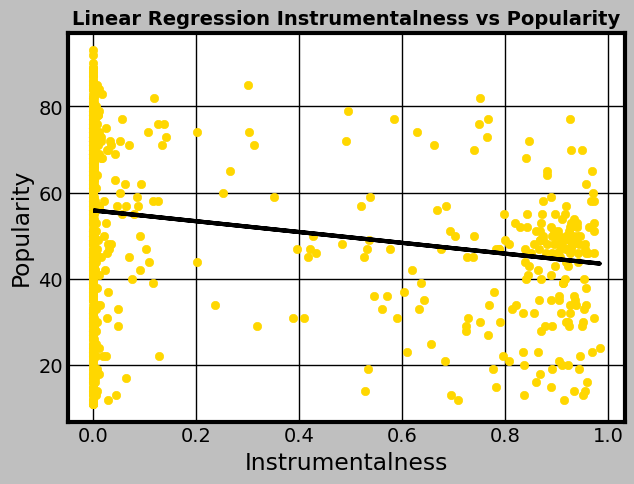

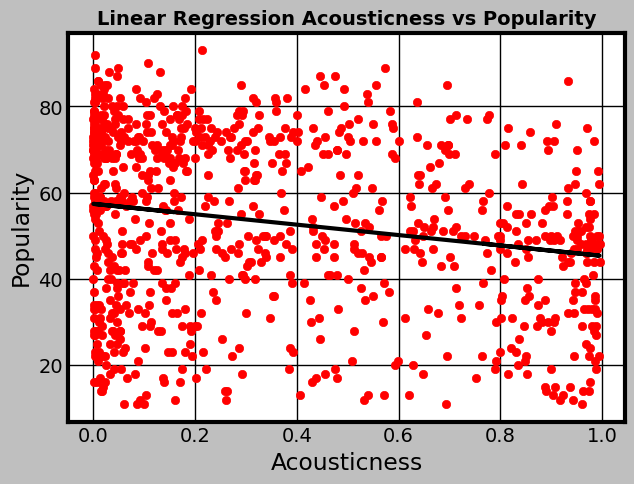

In [218]:
inst=pd.DataFrame(numeric['instrumentalness'])
acou=pd.DataFrame(numeric['acousticness'])
# training splits
inst_train, inst_test,yi_train, yi_test = train_test_split(inst,y,test_size=.2,random_state=55)
acou_train, acou_test,ya_train, ya_test = train_test_split(acou,y,test_size=.2,random_state=55)
# linear Regression objects
inst_model=LinearRegression().fit(inst_train,yi_train)
acou_model=LinearRegression().fit(acou_train,ya_train)
# R^2 scores
inst_score=inst_model.score(inst_test,yi_test)
acou_score=acou_model.score(acou_test,ya_test)
# predictions
acou_pre= acou_model.predict(acou_test)
inst_pre= inst_model.predict(inst_test)

# plot for instrumentalness
plt.scatter(inst_test,yi_test,color="gold")
plt.plot(inst_test,inst_pre,color="black",linewidth=3)
plt.title("Linear Regression Instrumentalness vs Popularity",fontsize=14, weight="bold")
plt.xlabel("Instrumentalness")
plt.ylabel("Popularity")
plt.show()
# plot for acousticness
plt.scatter(acou_test,ya_test,color="red")
plt.plot(acou_test,acou_pre,color="black",linewidth=3)
plt.title("Linear Regression Acousticness vs Popularity", fontsize=14, weight="bold")
plt.xlabel("Acousticness")
plt.ylabel("Popularity")
plt.show()

## Results – Q1: Song Count vs Average Popularity

The scatter plot shows **no strong relationship** between the number of tracks an artist
has and their average popularity. Most artists cluster around relatively low song counts,
and the points do not form any clear upward or downward trend.

The Pearson correlation coefficient is:

**r = 0.058**

This value is very close to zero, indicating that an artist releasing more songs does not
necessarily result in a higher proportion of popular songs. Some artists with only a few
tracks still achieve very high popularity ratios.


## Results – Q2: Top Artists and Their Musical Features

Among artists with at least 5 tracks, the top 10 artists all have a popularity ratio of
**1.0**, meaning every track they released (in this dataset) was categorized as popular.

These artists span a wide range of genres, including pop, rock, metal, hip-hop,
alternative, and emo rap. This indicates that strong popularity is not limited to a
single genre.

### Key Observations

- Artists such as **Linkin Park**, **Lana Del Rey**, **Coldplay**, and **Metallica**
  show the highest proportions of popular songs.

- These artists come from **diverse genres**, including pop, rock, hip-hop, metal,
  alternative, and emo rap — indicating that multiple genres can achieve strong popularity.

- High-energy artists like **My Chemical Romance**, **Metallica**, and **Linkin Park**
  tend to have high average energy values, suggesting that intense or dynamic musical
  styles resonate well with listeners.

- Pop artists such as **Katy Perry** and **Maroon 5** show higher **valence** and
  **danceability**, reflecting upbeat and emotionally positive styles that tend to
  appeal to large audiences.

- Artists such as **Lana Del Rey** and **Coldplay** have **lower energy and valence**,
  yet still maintain perfect popularity ratios — demonstrating that emotional,
  atmospheric, or mood-driven styles can also achieve high listener engagement.

- Overall, the diversity among these top artists suggests that high popularity on Spotify
  is **not driven by one specific musical feature**, but rather by how strongly the
  artist represents the strengths of their unique genre.
